In [1]:
import numpy as np
import matplotlib.pyplot as plt
import biotite.structure as struc
import biotite.structure.io.pdbx as pdbx
import biotite.database.rcsb as rcsb
from biotite2pymol import setup_parameters, select, to_pymol, show
from pymol2 import PyMOL


PNG_SIZE = (800, 800)


pymol_app = PyMOL()
pymol_app.start()
setup_parameters(pymol_instance=pymol_app)
cmd = pymol_app.cmd

In [2]:
assembly = pdbx.get_assembly(
    pdbx.PDBxFile.read(rcsb.fetch("1XI4", "cif")),
    model=1
)

In [3]:
# Structure contains only CA
# Bonds are not required for visulization -> empty bond list
assembly.bonds = struc.BondList(assembly.array_length())

In [4]:
# General configuration
cmd.bg_color("white")
cmd.set("cartoon_side_chain_helper", 1)
cmd.set("cartoon_oval_length", 0.8)
cmd.set("depth_cue", 0)
cmd.set("valence", 0)

 PyMOL not running, entering library mode (experimental)


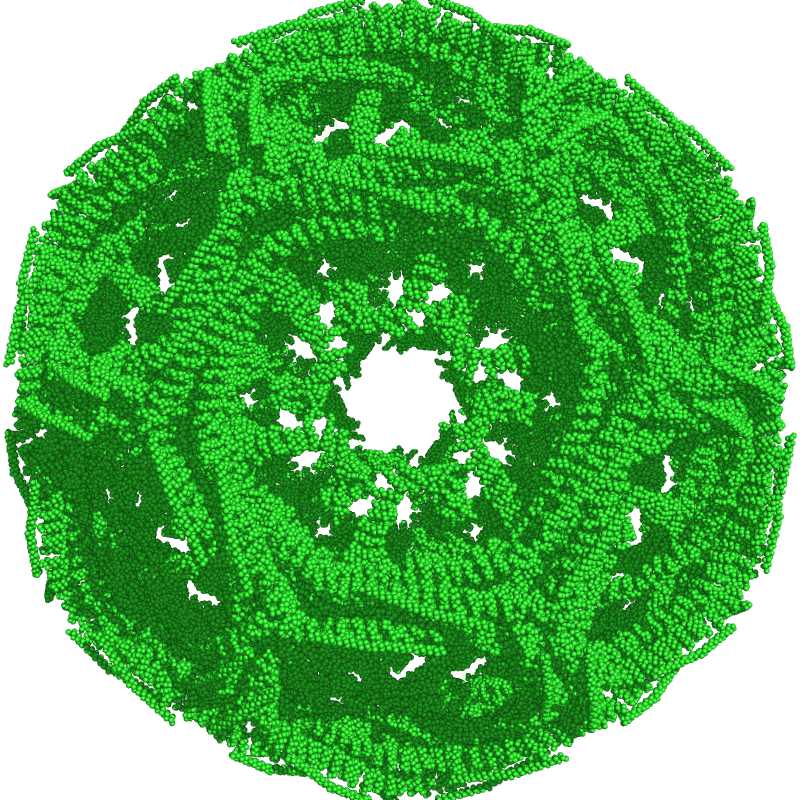

In [5]:
to_pymol("assembly", assembly, pymol_instance=pymol_app)

cmd.show_as("spheres")
cmd.set("sphere_scale", 1.5)
show(PNG_SIZE, pymol_instance=pymol_app)

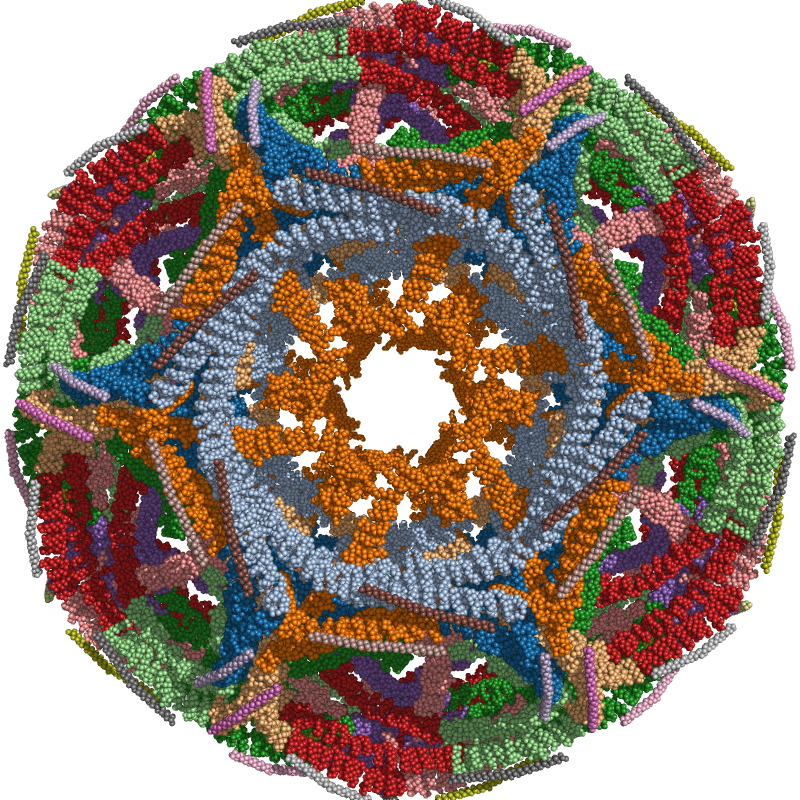

In [6]:
chain_ids = np.unique(assembly.chain_id)
for chain_id, color in zip(chain_ids, plt.get_cmap("tab20").colors):
    color_name = f"chain_{chain_id}_color"
    cmd.set_color(color_name, color)
    #cmd.color(color_name, select("assembly", assembly.chain_id == chain_id))
    cmd.color(color_name, f"chain {chain_id}")

show(PNG_SIZE, pymol_instance=pymol_app)

In [7]:
pymol_app.stop()